In [81]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage as ndi
from skimage import feature
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage.exposure import equalize_hist
from skimage.exposure import equalize_adapthist
from skimage.exposure import rescale_intensity
from skimage.feature import canny
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops
import pandas as pd

In [2]:
sys.path.insert(0, '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/musicalrobot')

In [3]:
frames = io.imread('../doc/CHCl_CA_DES_5_31_19.tiff')

In [4]:
frames.shape

(6668, 120, 160)

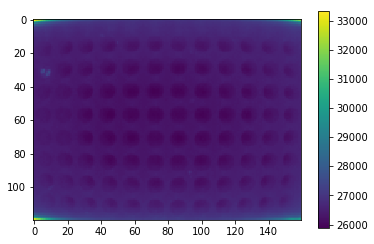

In [5]:
plt.imshow(frames[1])
plt.colorbar()

### Adding all the images in the frame to get a better contrast and reduce noise

In [6]:
for II in range(frames.shape[0]):
    frame = frames[II]
    img_eq = (frame - np.amin(frame))/(np.amax(frame)-np.amin(frame))
    if II == 0:
        img_ave = img_eq
    else:
        img_ave = img_ave + img_eq
img_average = img_ave/frames.shape[0]
img_eq = (img_ave - np.amin(img_ave))/(np.amax(img_ave)-np.amin(img_ave))

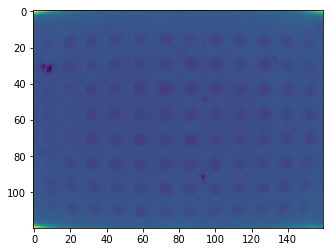

In [7]:
plt.imshow(img_eq)

/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


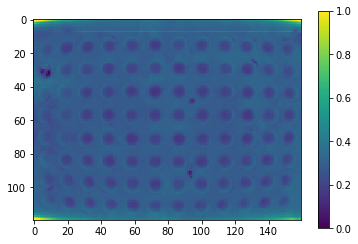

In [8]:
# gaus = gaussian(img_eq,sigma=0.25)
# sob = sobel(img_eq)
contrast = equalize_adapthist(img_eq, clip_limit=0.01)
plt.imshow(contrast)
plt.colorbar()

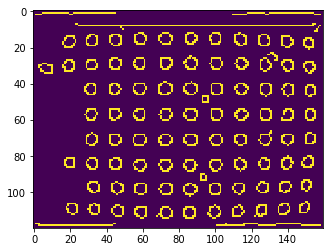

In [9]:
edges = feature.canny(contrast, sigma=1)
plt.imshow(edges)


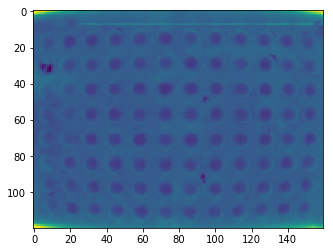

In [10]:
stretch = rescale_intensity(contrast)
plt.imshow(stretch)

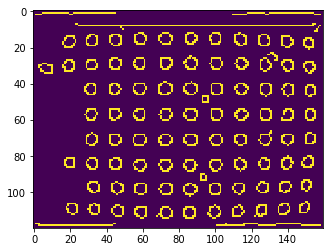

In [11]:
edges1 = feature.canny(stretch)
plt.imshow(edges1)

In [20]:
rows = img_eq.shape[0]
columns = img_eq.shape[1]

In [21]:
column_sum = []
for i in range(0,columns):
    column_sum.append(sum(img_eq[:,i]))
row_sum = []
for j in range(0,rows):
    row_sum.append(sum(img_eq[j,:]))

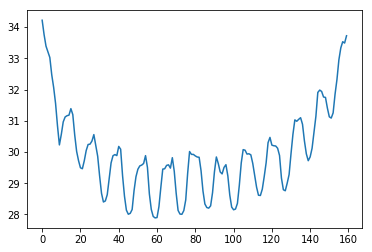

In [22]:
plt.plot(np.arange(len(column_sum)),column_sum)


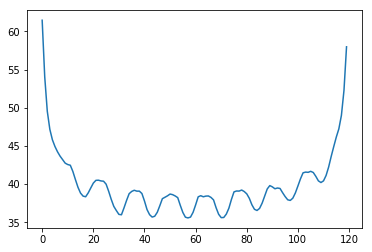

In [23]:
plt.plot(np.arange(len(row_sum)),row_sum)

In [24]:
column_sum = [x * -1 for x in column_sum]
row_sum = [x * -1 for x in row_sum]

In [48]:
from scipy.signal import find_peaks
column_troughs = find_peaks(column_sum,distance=10)
row_troughs = find_peaks(row_sum,distance=10)

In [49]:
row_troughs = row_troughs[0]
column_troughs = column_troughs[0]

In [68]:
row_troughs

array([ 17,  31,  43,  57,  70,  84,  97, 109])

In [62]:
# loc = np.ones((8,12))
# i = 0
# j = 0
# for element_y in row_troughs:
#     for element_x in column_troughs:
#         loc[i][j] = [[element_x,element_y]]
#         j = j + 1
#     i = i + 1

In [72]:
i

0

In [90]:
X = []
Y = []
i = 0
j = 0
for i in range(0,8):
    for j in range(0,12):
        X.append(column_troughs[j])
        j = j + 1
        Y.append(row_troughs[i])
    i = i + 1

In [91]:
well_location = pd.DataFrame(list(zip(X, Y)),columns =['X', 'Y'])

In [92]:
well_location

,X,Y
0,9,17
1,21,17
2,32,17
3,45,17
4,59,17
5,73,17
6,87,17
7,100,17
8,114,17
9,127,17
